# Analysis of the WeatherPy Challenge

For this project, we were tasked to find a relationship between latitude and differing weather conditions on Earth. The general approach for solving this problem was to generate a list of at least 500 cities with random latitude/longitude coordinates, use the OpenWeatherMap API to collect data regarding weather conditions for these cities, and generate plots to compare certain weather conditions with the range of latitudes from our cities. Plots comparing latitude with maximum temperatures, humidity percentages, cloud coverage, and wind speeds were generated. 

The plots showing northern latitudes vs. max temperature and southern latitudes vs. max temperature show a clear relationship between latitude and temperature. As the cities get farther away from the equator, their maximum temperature decreases. For the northern latitude portion, this is illustrated by a negative relationship. A positive relationship exists for the southern latitude graph. Large r-squared values help reinforce this conclusion.

Analyzing the latitude vs. humidity percentage graphs for the separate northern and southern hemispheres shows a trend in the positive direction for both graphs. This implies that humidity increases with latitude, all the way from -90 to 90 degrees. This may be skewed by a slight gap in representation of southern vs northern cities, with more cities from the northern hemisphere appearing in the data.

Graphs for latitude vs. wind speed for the northern and southern hemispheres tell us that wind speed increases as you get farther from the equator. This is evident from the positive trend in the northern data, and a negative trend in the southern data.

In [2]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from citipy import citipy
from config import weather_key

### Collecting Data from (at least) 500 Random Cities

In [4]:
#Generating random latitude/longitudes to collect random cities
lat_lng = []
cities = []

lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lng = zip(lats, lngs)

for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

613

In [21]:
#Performing API calls for each city
base_url = "https://api.openweathermap.org/data/2.5/weather?q="
record = 1

city_names = []
cloudiness = []
countries = []
dates = []
humidity = []
city_lats = []
city_lngs = []
max_temps = []
wind_speed = []

print("""Beginning Data Retrieval
------------------------------""")

for city in cities:
    try:
        target_url = f"{base_url}{city}&appid={weather_key}"
        response = requests.get(target_url)
        response_json = response.json()
        city_names.append(response_json['name'])
        cloudiness.append(response_json['clouds']['all'])
        countries.append(response_json['sys']['country'])
        dates.append(response_json['dt'])
        humidity.append(response_json['main']['humidity'])
        city_lats.append(response_json['coord']['lat'])
        city_lngs.append(response_json['coord']['lon'])
        fahrenheit = (response_json['main']['temp_max'] - 273.13) * (9/5) + 32
        max_temps.append(fahrenheit)
        mph = response_json['wind']['speed'] * 2.23694
        wind_speed.append(mph)
        print(f"Processing record {record} of {len(cities)}| {city}")
        record += 1
    except:
        print("City not found. Skipping...")
        record += 1
        
print("""------------------------------
Data Retrieval Complete
------------------------------""")

Beginning Data Retrieval
------------------------------
Processing record 1 of 641| esperance
Processing record 2 of 641| saskylakh
Processing record 3 of 641| bhandara
Processing record 4 of 641| hilo
Processing record 5 of 641| ushuaia
Processing record 6 of 641| saint-georges
Processing record 7 of 641| matara
Processing record 8 of 641| provideniya
Processing record 9 of 641| port alfred
Processing record 10 of 641| jamestown
Processing record 11 of 641| bluff
Processing record 12 of 641| souillac
Processing record 13 of 641| upernavik
Processing record 14 of 641| cordenons
Processing record 15 of 641| cristalina
Processing record 16 of 641| ostrovnoy
Processing record 17 of 641| nokaneng
Processing record 18 of 641| cidreira
City not found. Skipping...
Processing record 20 of 641| spearfish
Processing record 21 of 641| kapaa
Processing record 22 of 641| punta arenas
Processing record 23 of 641| yellowknife
Processing record 24 of 641| barrow
Processing record 25 of 641| kolokani
P

Processing record 215 of 641| ozernovskiy
Processing record 216 of 641| richmond hill
Processing record 217 of 641| cuenca
Processing record 218 of 641| manjacaze
Processing record 219 of 641| dikson
Processing record 220 of 641| malanje
Processing record 221 of 641| kamenka
Processing record 222 of 641| arraial do cabo
Processing record 223 of 641| mwinilunga
Processing record 224 of 641| oranjemund
Processing record 225 of 641| carolina
Processing record 226 of 641| te anau
Processing record 227 of 641| zheleznodorozhnyy
Processing record 228 of 641| bunia
Processing record 229 of 641| gigmoto
Processing record 230 of 641| roma
City not found. Skipping...
Processing record 232 of 641| kara-tyube
Processing record 233 of 641| namibe
Processing record 234 of 641| praya
Processing record 235 of 641| houlton
Processing record 236 of 641| vanino
Processing record 237 of 641| buraydah
Processing record 238 of 641| ocho rios
Processing record 239 of 641| sorland
Processing record 240 of 641

Processing record 428 of 641| kupang
City not found. Skipping...
Processing record 430 of 641| karasburg
Processing record 431 of 641| zhangye
Processing record 432 of 641| nijar
Processing record 433 of 641| yulara
Processing record 434 of 641| tsogni
Processing record 435 of 641| meulaboh
Processing record 436 of 641| santa cruz
Processing record 437 of 641| ahipara
Processing record 438 of 641| puerto lopez
Processing record 439 of 641| healdsburg
Processing record 440 of 641| yarkovo
Processing record 441 of 641| talavera de la reina
Processing record 442 of 641| newtonmore
Processing record 443 of 641| ascension
Processing record 444 of 641| coihaique
Processing record 445 of 641| ekhabi
Processing record 446 of 641| pangody
Processing record 447 of 641| doka
City not found. Skipping...
Processing record 449 of 641| tilichiki
Processing record 450 of 641| gazojak
Processing record 451 of 641| puerto asis
Processing record 452 of 641| lock haven
Processing record 453 of 641| alofi


Processing record 639 of 641| shubarkuduk
Processing record 640 of 641| yanam
Processing record 641 of 641| medvezhyegorsk
------------------------------
Data Retrieval Complete
------------------------------


In [22]:
#Create dataframe from data 
cities_dict = {"City": city_names, "Cloudiness": cloudiness, "Country": countries, "Date": dates, "Humidity": humidity, 
             "Lat": city_lats, "Lng": city_lngs, "Max Temp": max_temps, "Wind Speed": wind_speed}

cities_df = pd.DataFrame(cities_dict)
cities_df.to_csv("../WeatherPy/output_data.csv", index=False, header=True)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Esperance,100,AU,1583994880,64,-33.87,121.90,73.436,21.922012
1,Saskylakh,99,RU,1583994933,91,71.92,114.08,3.596,16.978375
2,Bhandāra,20,IN,1583994902,48,21.17,79.65,84.236,3.355410
3,Hilo,90,US,1583994884,78,19.73,-155.09,71.636,5.748936
4,Ushuaia,90,AR,1583994621,93,-54.80,-68.30,46.436,4.697574


### Generating Scatter Plots from our List of Cities

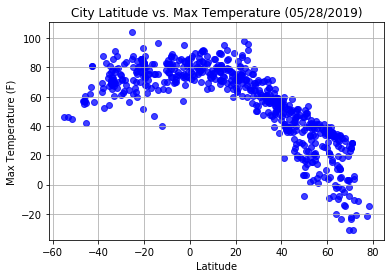

In [23]:
#Latitude vs. Temperature
latitudes = cities_df['Lat']
temperature = cities_df['Max Temp']
lat_temp = plt.scatter(latitudes, temperature, facecolor='blue', alpha=0.75)
plt.title("City Latitude vs. Max Temperature (05/28/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('Lat_Temp.png')

The above figure shows the change in temperature related to the change in latitude. There is a peak in temperature right around 0 degrees of latitude. This indicates that the climate is hotter near the equator, and reduces in temperature as you get nearer the poles.

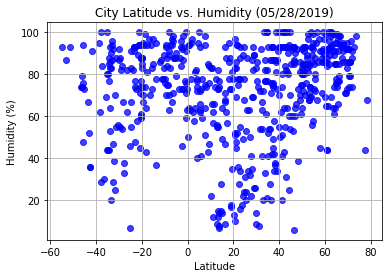

In [24]:
#Latitude vs. Humidity
humidities = cities_df['Humidity']
lat_hum = plt.scatter(latitudes, humidities, facecolor='blue', alpha=0.75)
plt.title("City Latitude vs. Humidity (05/28/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Lat_Hum.png")

The graph of Latitude vs. Humidity shows clear distinctions around -30 and 30 degrees of latitude. In these areas, a wide range of humidities is discovered, most likely due to the higher _specific humidity_ as opposed to the equator and poles. 

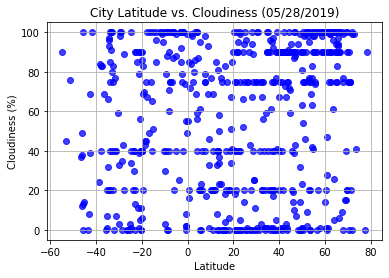

In [25]:
#Latitude vs. Cloudiness
clouds = cities_df['Cloudiness']
lat_cloud = plt.scatter(latitudes, clouds, facecolor='blue', alpha=0.75)
plt.title("City Latitude vs. Cloudiness (05/28/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Lat_Cloud.png")

Not much of a relation can be seen between latitude and cloud cover from this graph. There is a wide variety of cloud cover percentages across all latitudes.

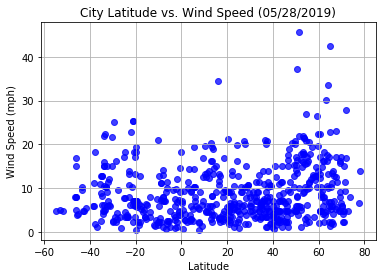

In [26]:
#Latitude vs. Wind Speed
wind = cities_df['Wind Speed']
lat_wind = plt.scatter(latitudes, wind, facecolor='blue', alpha=0.75)
plt.title("City Latitude vs. Wind Speed (05/28/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Lat_Wind.png")

The relation between latitude and wind speed looks to be a direct correlation, albeit very subtle. Higher latitudes correspond to higher wind speeds, and lower latitudes experience lower wind speeds, as depicted by the graph above.

### Separating Northern and Southern Hemispheres, and Adding Linear Regression Lines

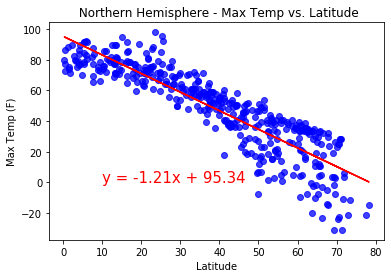

The r-squared is: -0.8862726179035626


In [35]:
#Northern Hemisphere - Max Temp vs. Latitude
north_df = cities_df[cities_df['Lat'] >= 0]
north_lat = north_df['Lat']
north_temp = north_df['Max Temp']

plt.scatter(north_lat, north_temp, facecolor='blue', alpha=0.75)
plt.title(" Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.savefig('Lat_Temp_North.png')
plt.show()
print(f"The r-squared is: {rvalue}")

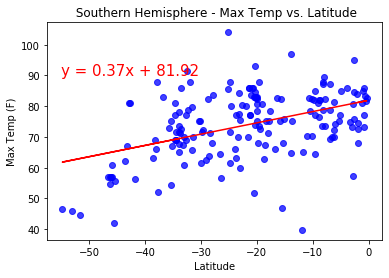

The r-squared is: 0.4452651190306921


In [36]:
# Southern Hemisphere - Max Temp vs. Latitude
south_df = cities_df[cities_df['Lat'] < 0]
south_lat = south_df['Lat']
south_temp = south_df['Max Temp']

plt.scatter(south_lat, south_temp, facecolor='blue', alpha=0.75)
plt.title(" Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.savefig('Lat_Temp_South.png')
plt.show()
print(f"The r-squared is: {rvalue}")

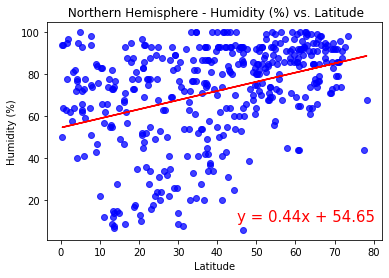

The r-squared is: 0.37171220927981224


In [37]:
#Northern Hemisphere - Humidity (%) vs. Latitude
north_hum = north_df['Humidity']

plt.scatter(north_lat, north_hum, facecolor='blue', alpha=0.75)
plt.title(" Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_hum)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.savefig('Lat_Hum_North.png')
plt.show()
print(f"The r-squared is: {rvalue}")


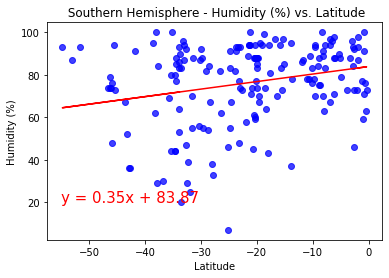

The r-squared is: 0.246945843912428


In [38]:
#Southern Hemisphere - Humidity (%) vs. Latitude
south_hum = south_df['Humidity']

plt.scatter(south_lat, south_hum, facecolor='blue', alpha=0.75)
plt.title(" Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_hum)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.savefig('Lat_Hum_South.png')
plt.show()
print(f"The r-squared is: {rvalue}")

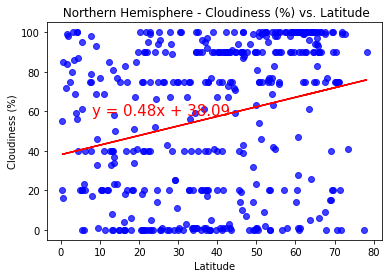

The r-squared is: 0.2589247431959695


In [39]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
north_cloud = north_df['Cloudiness']

plt.scatter(north_lat, north_cloud, facecolor='blue', alpha=0.75)
plt.title(" Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(8,58),fontsize=15,color="red")
plt.savefig('Lat_Cloud_North.png')
plt.show()
print(f"The r-squared is: {rvalue}")

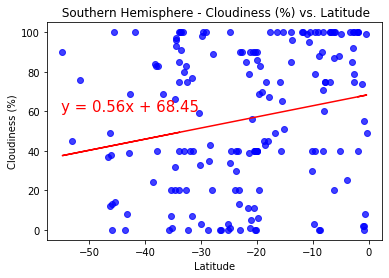

The r-squared is: 0.20992337129911


In [40]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
south_cloud = south_df['Cloudiness']

plt.scatter(south_lat, south_cloud, facecolor='blue', alpha=0.75)
plt.title(" Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.savefig('Lat_Cloud_South.png')
plt.show()
print(f"The r-squared is: {rvalue}")

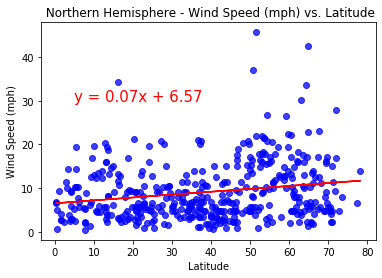

The r-squared is: 0.20053611184598474


In [41]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
north_wind = north_df['Wind Speed']

plt.scatter(north_lat, north_wind, facecolor='blue', alpha=0.75)
plt.title(" Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.savefig('Lat_Wind_North.png')
plt.show()
print(f"The r-squared is: {rvalue}")

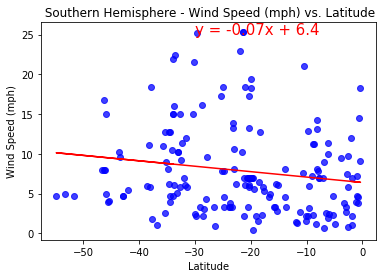

The r-squared is: -0.1619568576088216


In [42]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
south_wind = south_df['Wind Speed']

plt.scatter(south_lat, south_wind, facecolor='blue', alpha=0.75)
plt.title(" Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.savefig('Lat_Wind_South.png')
plt.show()
print(f"The r-squared is: {rvalue}")